$$
In\;the\;nome\;of\;God
$$

# Problem1

$$
we've\;decided\;not\;to\;use\;the\;inference\;system\;to\;figure\;out
\\what'd\;happen\;down\;the\;hill
$$

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

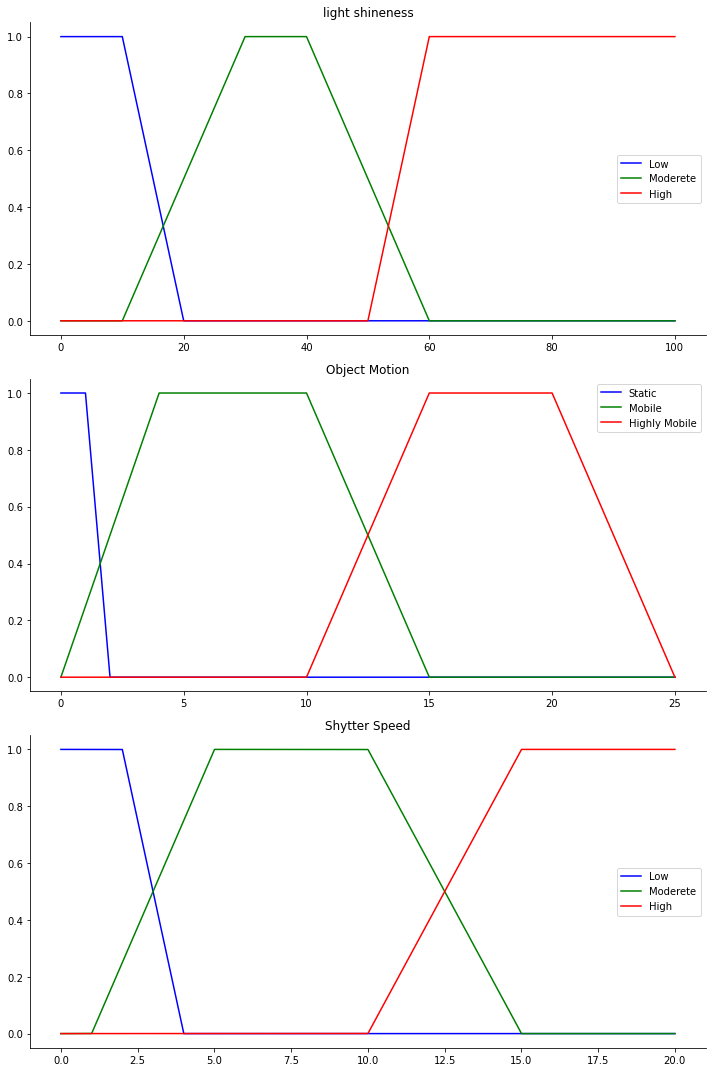

In [7]:
# Generate universe variables
#sources: "https://github.com/scikit-fuzzy/scikit-fuzzy/blob/master/skfuzzy/membership/generatemf.py"

#   * Light on subjective ranges [0, 100]
#   * Motion on subjective ranges [0, 25] in units of percentage points
#   * Shutter Speed has a range of [0, 20] in small steps (due to the data)
x_light = np.arange(0, 101, 1)
x_motion = np.arange(0, 26, 1)
x_ss  = np.arange(0, 20, 0.0001)                                        

# Generate fuzzy membership functions
light_lo = fuzz.trapmf(x_light, [0, 0, 10, 20])
light_md = fuzz.trapmf(x_light, [10, 30, 40, 60])
light_hi = fuzz.trapmf(x_light, [50, 60, 100, 100])

motion_st = fuzz.trapmf(x_motion, [0, 0, 1, 2])
motion_mo = fuzz.trapmf(x_motion, [0, 4, 10, 15])
motion_hi = fuzz.trapmf(x_motion, [10, 15, 20, 25])

ss_lo = fuzz.trapmf(x_ss, [0, 0, 2, 4])
ss_md = fuzz.trapmf(x_ss, [1, 5, 10, 15])
ss_hi = fuzz.trapmf(x_ss, [10, 15, 20, 20])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 15))

ax0.plot(x_light, light_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_light, light_md, 'g', linewidth=1.5, label='Moderete')
ax0.plot(x_light, light_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('light shineness')
ax0.legend()

ax1.plot(x_motion, motion_st, 'b', linewidth=1.5, label='Static')
ax1.plot(x_motion, motion_mo, 'g', linewidth=1.5, label='Mobile')
ax1.plot(x_motion, motion_hi, 'r', linewidth=1.5, label='Highly Mobile')
ax1.set_title('Object Motion')
ax1.legend()

ax2.plot(x_ss, ss_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_ss, ss_md, 'g', linewidth=1.5, label='Moderete')
ax2.plot(x_ss, ss_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Shytter Speed')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()